In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
import pandas as pd
import numpy as np

    

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
RANDOM_STATE = 42

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
RANDOM_STATE = 42

In [ ]:
import pandas as pd
label_col = "status"

df = pd.read_csv("data.csv")

continuous_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if label_col in continuous_cols:
    continuous_cols.remove(label_col)
X = df[continuous_cols].copy()
y = df[label_col].copy() if label_col in df.columns else None

In [4]:
if y is not None:
    counts = y.value_counts()
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f" Phát hiện {missing_count} giá trị thiếu")
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)
else:
    X_imputed = X.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [5]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=RANDOM_STATE, 
            perplexity=30, max_iter=1000, verbose=0)
X_tsne = tsne.fit_transform(X_scaled)

Đã lưu biểu đồ: 'pca_2d_projection.png'


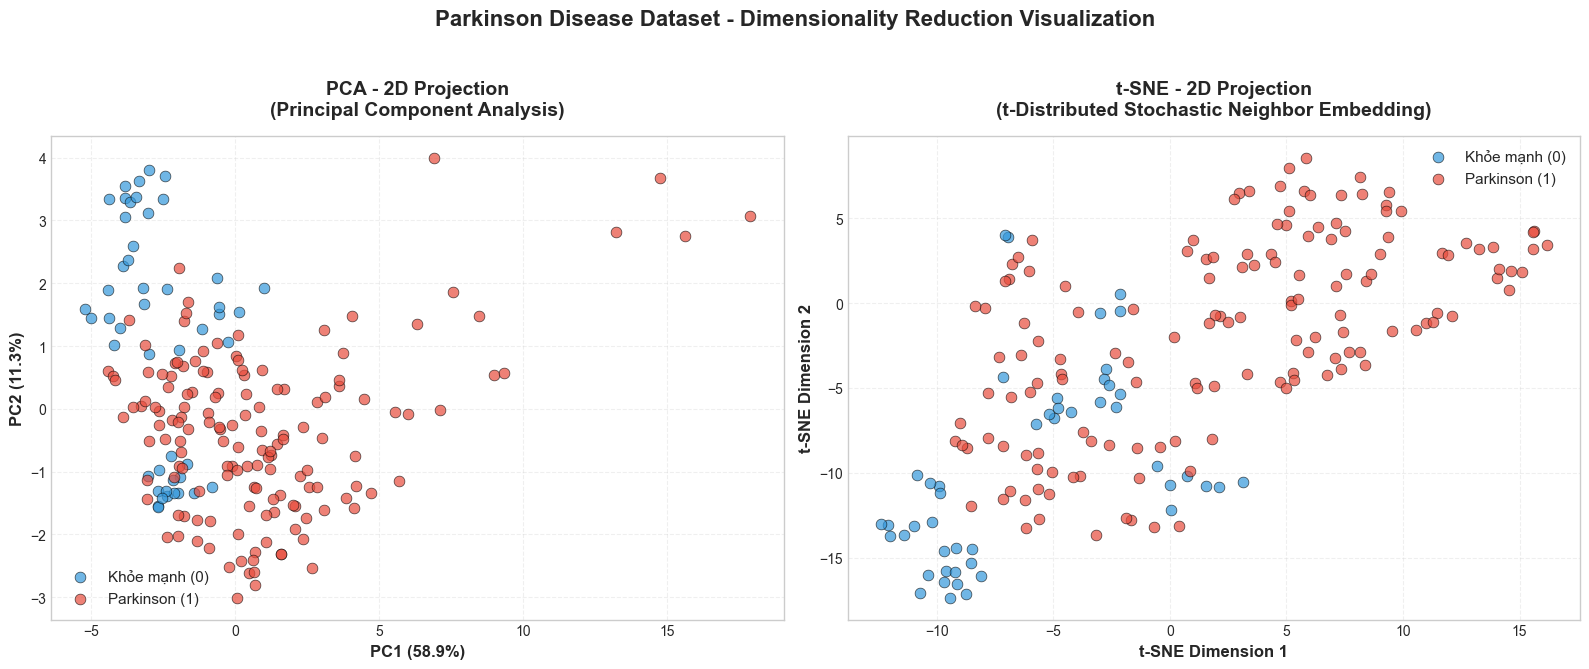

In [6]:
fig = plt.figure(figsize=(16, 7))
ax1 = plt.subplot(1, 2, 1)

if y is not None:
    colors = ['#3498db', '#e74c3c'] 
    labels_text = ['Khỏe mạnh (0)', 'Parkinson (1)']
    for status, color, label in zip([0, 1], colors, labels_text):
        mask = y == status
        ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=color, label=label, s=60, alpha=0.7, 
                   edgecolors='black', linewidth=0.5)
    ax1.legend(loc='best', fontsize=11, framealpha=0.9)
else:
    ax1.scatter(X_pca[:, 0], X_pca[:, 1], s=60, alpha=0.7)
    
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', 
               fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', 
               fontsize=12, fontweight='bold')
ax1.set_title('PCA - 2D Projection\n(Principal Component Analysis)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')

ax2 = plt.subplot(1, 2, 2)
if y is not None:
    for status, color, label in zip([0, 1], colors, labels_text):
        mask = y == status
        ax2.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                   c=color, label=label, s=60, alpha=0.7,
                   edgecolors='black', linewidth=0.5)
    ax2.legend(loc='best', fontsize=11, framealpha=0.9)
else:
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], s=60, alpha=0.7)
ax2.set_xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
ax2.set_title('t-SNE - 2D Projection\n(t-Distributed Stochastic Neighbor Embedding)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--')
fig.suptitle('Parkinson Disease Dataset - Dimensionality Reduction Visualization', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
output_file = 'pca_2d_projection.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Đã lưu biểu đồ: '{output_file}'")

plt.show()

In [7]:
report = f"""
I. THÔNG TIN DỮ LIỆU
   Tổng số mẫu: {len(df)}
   Số features sử dụng: {len(continuous_cols)}
   Phân bố nhãn:
    - Bệnh Parkinson (1): {counts[1]} mẫu ({counts[1]/len(y)*100:.1f}%)
    - Khỏe mạnh (0): {counts[0]} mẫu ({counts[0]/len(y)*100:.1f}%)
II. DANH SÁCH CÁC CỘT SỬ DỤNG
"""
cols_per_row = 3
for i in range(0, len(continuous_cols), cols_per_row):
    row_cols = continuous_cols[i:i+cols_per_row]
    report += "  " + " | ".join(f"{j+i+1:2d}. {col:20s}" 
                                 for j, col in enumerate(row_cols)) + "\n"
report += f"""
III. KẾT QUẢ GIẢM CHIỀU - PCA
   Số thành phần chính: 2
   Variance Explained:
    - PC1 (Thành phần chính 1): {pca.explained_variance_ratio_[0]*100:.2f}%
    - PC2 (Thành phần chính 2): {pca.explained_variance_ratio_[1]*100:.2f}%
    - Tổng cộng: {sum(pca.explained_variance_ratio_)*100:.2f}%
"""
print(report)
with open('bao_cao_quan_sat.txt', 'w', encoding='utf-8') as f:
    f.write("BÁO CÁO QUAN SÁT - PHÂN TÍCH DỮ LIỆU PARKINSON\n")
    f.write(report)
print("\nĐã lưu báo cáo chi tiết: 'bao_cao_quan_sat.txt'")


I. THÔNG TIN DỮ LIỆU
   Tổng số mẫu: 195
   Số features sử dụng: 22
   Phân bố nhãn:
    - Bệnh Parkinson (1): 147 mẫu (75.4%)
    - Khỏe mạnh (0): 48 mẫu (24.6%)
II. DANH SÁCH CÁC CỘT SỬ DỤNG
   1. MDVP:Fo(Hz)          |  2. MDVP:Fhi(Hz)         |  3. MDVP:Flo(Hz)        
   4. MDVP:Jitter(%)       |  5. MDVP:Jitter(Abs)     |  6. MDVP:RAP            
   7. MDVP:PPQ             |  8. Jitter:DDP           |  9. MDVP:Shimmer        
  10. MDVP:Shimmer(dB)     | 11. Shimmer:APQ3         | 12. Shimmer:APQ5        
  13. MDVP:APQ             | 14. Shimmer:DDA          | 15. NHR                 
  16. HNR                  | 17. RPDE                 | 18. DFA                 
  19. spread1              | 20. spread2              | 21. D2                  
  22. PPE                 

III. KẾT QUẢ GIẢM CHIỀU - PCA
   Số thành phần chính: 2
   Variance Explained:
    - PC1 (Thành phần chính 1): 58.90%
    - PC2 (Thành phần chính 2): 11.30%
    - Tổng cộng: 70.20%


Đã lưu báo cáo chi tiết: 'ba